# Ford GoBike Visual Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
plt.figure(figsize=[ 11.69, 8.27]);

<Figure size 841.68x595.44 with 0 Axes>

In [2]:
"""To get the distance we consider the Haversine Formula, (we provide the link at the end) and considering the Earth radius as 6373.0
We create a function to calculate this distance and then we store it in the new column."""
def distance_calculator(start_lat, start_lon, end_lat, end_lon):
    R = 6373.0 #Earth radius in Km
    lat1 = math.radians(start_lat)
    lon1 = math.radians(start_lon)

    lat2 = math.radians(end_lat)
    lon2 = math.radians(end_lon)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_clean = df.query('member_birth_year > 1949 & member_birth_year < 2002 & duration_sec < 2500')
df_clean['member_age']= df_clean['member_birth_year'].apply(lambda x: 2021-x)
df_clean['duration_min']= df_clean['duration_sec'].apply(lambda x: x/60)
df_clean.describe()

C:\Users\marinora\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marinora\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,duration_min
count,171712.000000,171525.000000,171712.000000,171712.000000,171525.000000,171712.000000,171712.000000,171712.000000,171712.000000,171712.000000,171712.000000
mean,600.259533,138.719650,37.770703,-122.351099,136.113389,37.770890,-122.350650,4479.883415,1984.996378,36.003622,10.004326
std,393.115029,111.294411,0.101289,0.118608,110.855786,0.101191,0.118149,1659.429436,9.653147,9.653147,6.551917
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1950.000000,20.000000,1.016667
25%,320.000000,47.000000,37.770083,-122.411738,44.000000,37.770407,-122.411647,3799.000000,1980.000000,29.000000,5.333333
50%,504.000000,104.000000,37.780760,-122.398279,100.000000,37.781010,-122.397405,4959.000000,1987.000000,34.000000,8.400000
75%,771.000000,239.000000,37.797320,-122.281193,233.000000,37.797320,-122.285171,5504.000000,1992.000000,41.000000,12.850000
max,2499.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,71.000000,41.650000


In [4]:
for row_index, row in df_clean.iterrows():
    distance = distance_calculator(start_lat=row['start_station_latitude'], start_lon=row['start_station_longitude']
                        , end_lat=row['end_station_latitude'], end_lon=row['end_station_longitude'])
    df_clean.at[row_index, 'distance_km'] = distance
    df_clean.at[row_index, 'speed_km/h'] = (distance*(60*60))/df_clean.at[row_index, 'duration_sec']
"""
Finally we have calculated the speed in km/h just dividing the distance betwen the duration 
   and tranforming the seconds in hours multiplying per 60 twice.
   """
print(str(df_clean['distance_km'].describe())+'\n')
print(df_clean['speed_km/h'].describe())

C:\Users\marinora\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marinora\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


count    171712.000000
mean          1.691086
std           1.073419
min           0.000000
25%           0.917587
50%           1.431124
75%           2.221784
max          15.678876
Name: distance_km, dtype: float64

count    171712.000000
mean         10.991646
std           3.760726
min           0.000000
25%           8.856399
50%          11.148514
75%          13.414848
max          28.650492
Name: speed_km/h, dtype: float64


In this analysis we will review the data in the Ford GoBike dataset. This dataset contains information about a rental bike service measuring variables as the distance, the duration in seconds and user information as gender and age.

## Exploration

The **duration variable** is following a Poisson curve with a peak skweded to the left. This is telling us that most of the customers use this service for short periods of time, mainly less than 15 minutes. Something ususal in cities where you can use these bikes an alternative transport.

Also, if we check the **distance variable** we can see a similar distribution. Both variables are related, since longer rides usually are those that goes further is distance. Hence, as people rides the bike in short periods of time it's normal that the most of them go down just a 2 or 3 km.

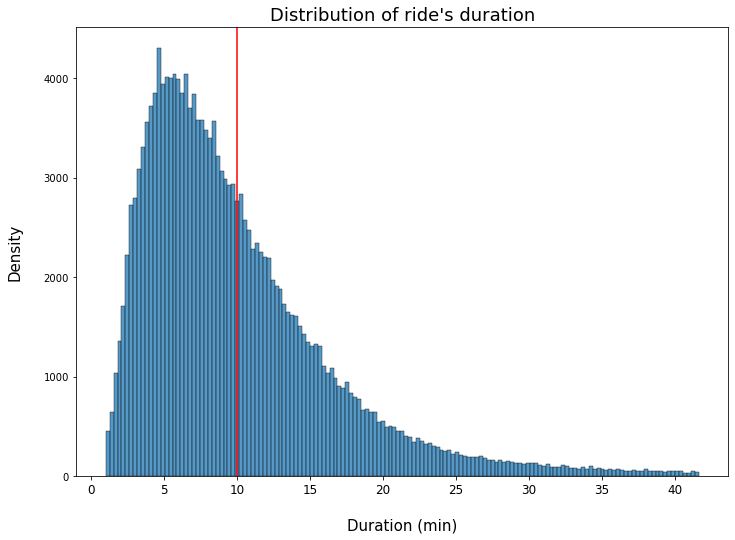

In [5]:
plt.figure(figsize=[ 11.69, 8.27]);
ax = sns.histplot((df_clean['duration_sec']/60));
dur_mean = (df_clean['duration_min']).mean()
plt.axvline(dur_mean, color='red');
plt.xlabel('\nDuration (min)', size=15);
plt.ylabel('Density\n', size=15);
plt.xticks(size=12);
plt.title("Distribution of ride's duration", size=18);

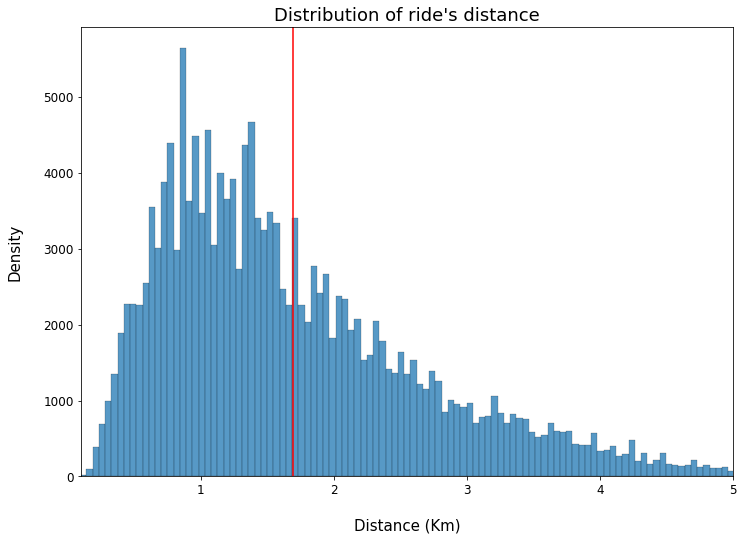

In [6]:
#We display distance and adjust the x-axis limit to have a better understanding
plt.figure(figsize=[ 11.69, 8.27]);
sns.histplot(df_clean['distance_km']);
plt.axvline(df_clean['distance_km'].mean(), color='red');
plt.xlabel('\nDistance (Km)', size=15);
plt.ylabel('Density\n', size=15);
plt.title("Distribution of ride's distance", size=18);
plt.xlim(0.1 ,5);
plt.xticks(size=12);
plt.yticks(size=12);

**However, is this the normal behaviour for all the users?**

We will review our how our users defined their gender in order to look for patterns. For example, we could find that those that defined themselves as *Male* use the the bikes for shorter rides or those who call themselves *Female* are those which make longer rides.

Looking at the distribution clearly the number of persons which defines their gender as **'Male'** is clearly bigger than those which defined themselves as **'Female'** or **'Other'**. Therefore, any conclusion we obtain from the data will reflect more a male-kind behaviour. So, let's plot **distance** and **duration** split by **gender**.

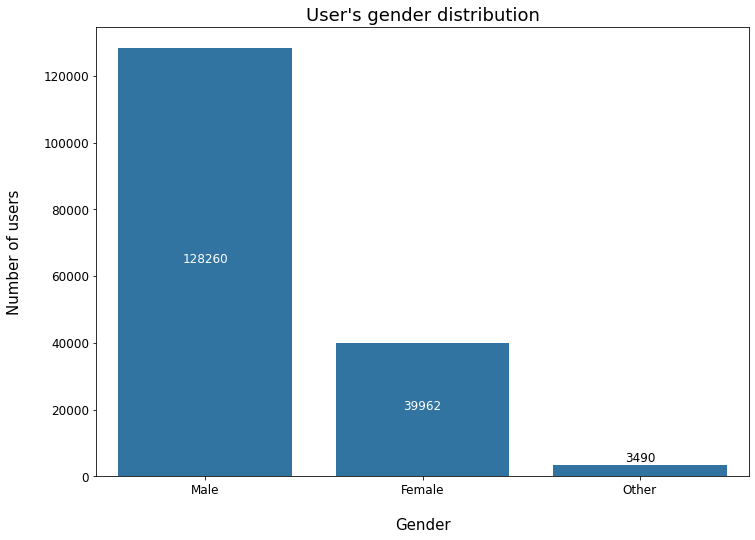

In [7]:
plt.figure(figsize=[ 11.69, 8.27]);
xa = sns.countplot(x=df_clean['member_gender'], color= sns.color_palette()[0]);

for i in range(df_clean['member_gender'].dropna().nunique()):
    g = df_clean['member_gender'].dropna().unique()[i]
    xlabel = df_clean.query(f'member_gender == "{g}"')['member_gender'].count()
    if g == 'Other':
          plt.text(i,xlabel+xlabel*0.25,xlabel, ha='center',color='black', size='12');
    else:
        xlabel = df_clean.query(f'member_gender == "{g}"')['member_gender'].count()
        plt.text(i,xlabel*0.5,xlabel, ha='center',color='white', size='12');
plt.title("User's gender distribution", size=18)        
plt.xlabel('\nGender', size=15);
plt.ylabel('Number of users\n', size=15);
plt.xticks(size=12);
plt.yticks(size=12);

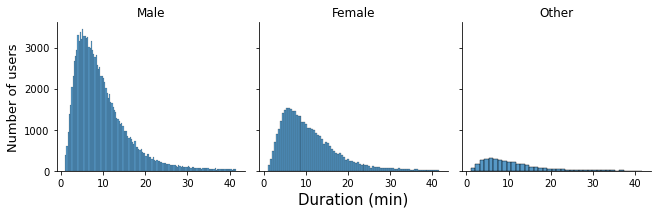

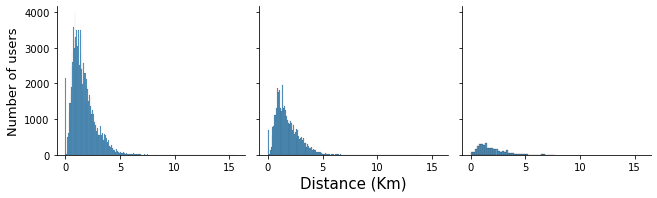

In [8]:
ax = sns.FacetGrid(data=df_clean, col='member_gender');
ax.map(sns.histplot,'duration_min');

axes = ax.axes.flatten()
axes[0].set_ylabel('Number of users', size=13);
axes[0].set_title("Male");
axes[0].set_xlabel("")
axes[1].set_title("Female");
axes[1].set_xlabel("Duration (min)", size = 15);
axes[2].set_title("Other");
axes[2].set_xlabel("");

ax2 = sns.FacetGrid(data=df_clean, col='member_gender');
ax2.map(sns.histplot,'distance_km');
axes2 = ax2.axes.flatten()
axes2[0].set_ylabel('Number of users', size=13);
axes2[0].set_title("");
axes2[0].set_xlabel("");
axes2[1].set_title("");
axes2[1].set_xlabel("Distance (Km)", size = 15);
axes2[2].set_title("");
axes2[2].set_xlabel("");

We can see that the gender is not affecting the **duration** or **distance** distribution, of course the size is completely different.

Ford GoBike users have similar behaviour when they use this bike service. We could conclude them that user feels Ford GoBike rental bikes as a good alternative for short rides 

We have seen that gender is not affecting those variables we are analyzing, but we could think that one thing could affect for sure the time a person spends over a bicycle, the **age**.

Having the year of birth for most of the users we were able to calculate the age (considering 2021 as the current year). My initial thought is that older people could have longer rides since they could not go as fast as younger ones. So, let see what the data tell us!

First, let see how the age is distributed in the dataset.

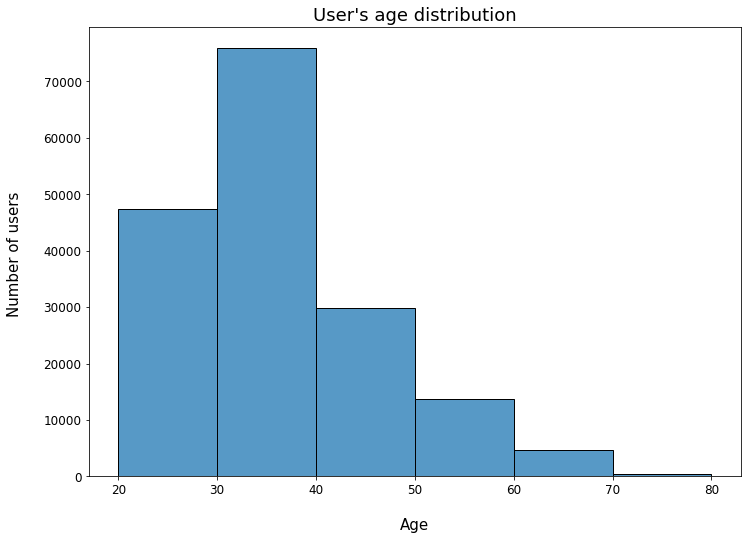

In [9]:
plt.figure(figsize=[ 11.69, 8.27]);
bins = np.arange(20,90,10);
ch=sns.histplot(df_clean['member_age'], bins=bins, color=sns.color_palette()[0]);

plt.xlabel('\nAge', size=15);
plt.ylabel('Number of users \n', size=15);
plt.title("User's age distribution", size=18);
plt.xticks(size=12);
plt.yticks(size=12);

Clearly the younger people is the most common user, most of the users are from 20 to 40 years old. This makes sense as this type of service could be more attractive for young people than for people with movility problems (caused by the age for example).

With this ideas we can explore the previous metrics grouping even more the age for making easier to understand the effect. This will leave 3 main groups based on the number of users in each one:

- **Young group**: <30 years old.
- **Middle group**: 30 - 40 years old.
- **Older group**: +40 years old.

In [10]:
#Defining the bins for the age_groups we defined before.
bins = pd.IntervalIndex.from_tuples([(0, 30), (30, 40), (40, 80)])
#Creating the column that will store this dimension.
df_clean['age_groups'] = pd.cut(df_clean['member_age'], bins=bins)
plt.figure(figsize=[ 11.69, 8.27]);

C:\Users\marinora\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 841.68x595.44 with 0 Axes>

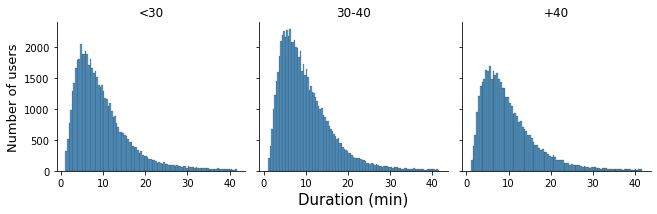

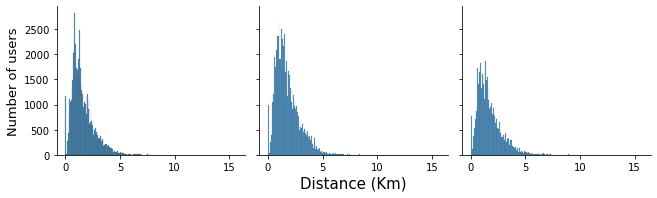

In [11]:
ax = sns.FacetGrid(data=df_clean, col='age_groups');
ax.map(sns.histplot,'duration_min');

axes = ax.axes.flatten()
axes[0].set_ylabel("Number of users", size=13);
axes[0].set_title("<30");
axes[0].set_xlabel("")
axes[1].set_title("30-40");
axes[1].set_xlabel("Duration (min)", size = 15);
axes[2].set_title("+40");
axes[2].set_xlabel("");

ax2 = sns.FacetGrid(data=df_clean, col='age_groups');
ax2.map(sns.histplot,'distance_km');

axes2 = ax2.axes.flatten()
axes2[0].set_ylabel("Number of users", size=13);
axes2[0].set_title("");
axes2[0].set_xlabel("");
axes2[1].set_title("");
axes2[1].set_xlabel("Distance (Km)", size = 15);
axes2[2].set_title("");
axes2[2].set_xlabel("");

I was expecting some differences between groups, but sadly both variables keep the same distribution for all age groups. Theregore, we know now that the age or gender is not affecting how the user's behaviour, they all have the same perception of this service and use them for short periods of time for short distance rides.


### Conclusions

After reviewing the dataset we have found a few interesting insights for comunicate to our client. It's true that we focus our research in the quantitative metrics distance, duration and speed and the qualitatives gender and groups of age. The main reasons for this is for having a better understanding of the final user using their demogrpahical information and look for patterns among them.

- Most of the users are **males between 30 and 50 years old**.
- The **Gender groups** have a similar behaviour in terms of duration and distance.
- The **user's age** is not affecting on how they use Ford GoBike rental service.

Further analysis can be made using different charts and approaches. That would enrich this preliminary analysis, perhaps finding interesting insights related with other demographic variables.

## Bibliography

Distance calculation with Haversine Formula: https://www.kite.com/python/answers/how-to-find-the-distance-between-two-lat-long-coordinates-in-python